In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV descargado desde Kaggle
df = pd.read_csv('heart.csv')

# Mostrar las primeras filas
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


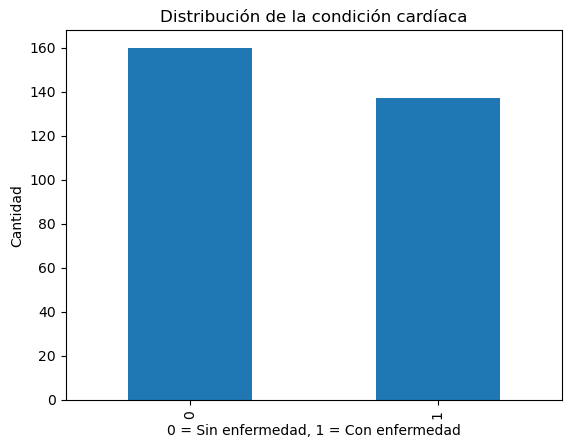

In [14]:
# Información general del dataset
df.info()

# Resumen estadístico
df.describe()

# Comprobar valores nulos
df.isnull().sum()

# Distribución de la variable objetivo
df['condition'].value_counts().plot(kind='bar')
plt.title("Distribución de la condición cardíaca")
plt.xlabel("0 = Sin enfermedad, 1 = Con enfermedad")
plt.ylabel("Cantidad")
plt.show()


In [16]:
# Convertir a problema binario: 0 = sin enfermedad, 1 = con enfermedad
df['condition'] = df['condition'].apply(lambda x: 1 if x > 0 else 0)

# Verificación de conversión
df['condition'].value_counts()


condition
0    160
1    137
Name: count, dtype: int64

In [18]:
# Variables predictoras y objetivo
X = df.drop('condition', axis=1)
y = df['condition']


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ahora dividimos los datos escalados
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


In [30]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

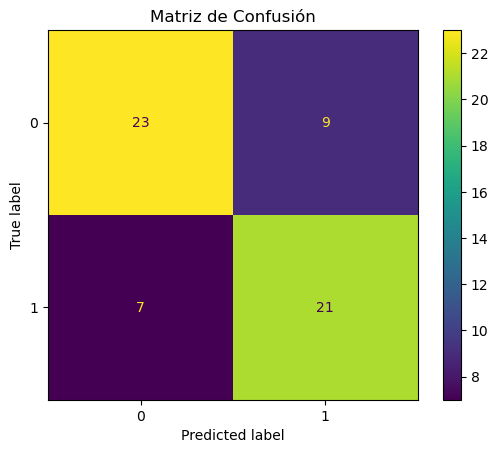

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [32]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predicciones
y_pred = model.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de Confusión")
plt.show()

# Métricas del modelo
print(classification_report(y_test, y_pred))


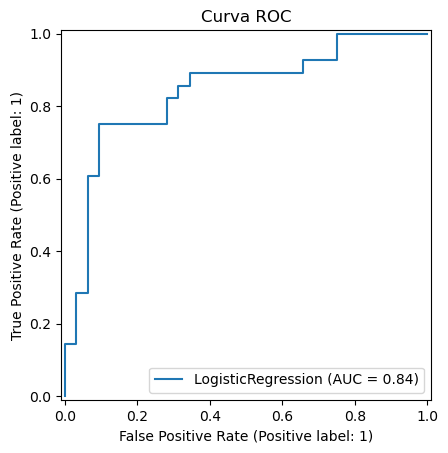

In [34]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("Curva ROC")
plt.show()


In [ ]:
### Análisis del modelo de Regresión Logística

### El modelo permite predecir con buena precisión la presencia de enfermedad cardíaca.
### Se observa una buena sensibilidad (recall), lo que es crucial para detectar correctamente a los pacientes enfermos.
### La matriz de confusión y la curva ROC muestran que el modelo es útil para clasificación binaria.
### Podría mejorarse usando normalización, eliminación de outliers o seleccionando mejor las variables.